# 폴더 구조

```bash
root
├── train                             동영상 mp4 파일만
│   ├── 1
│   ├── 2
│   ├── 3
│   ├── 4
│   ├── 5
│   ├── 6
│   ├── 7
│   ├── 8
│   └── 9
├── test                              사진 jpg,heic확장자들만
     ├── 1
     ├── 2
     ├── 3
     ├── 4
     ├── 5
     ├── 6
     ├── 7
     ├── 8
     └── 9

``` 

## 폴더 이름은 숫자로 적기
```python

1 : '고모령비'

2 : '국립대구박물관'

3 : '들안길먹거리타운' 

4 : '모명재' 

5 : '범어대성당' 

6 : '수성아트피아' 

7 : '수성패밀리파크' 

8 : '영남제일관' 

9 : '항일독립운동기념탑' 

```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import PIL
from PIL import Image

In [2]:
# photo 폴더를 train test 폴더로 분리! (수작업으로 나눔)
# train : 동영상데이터 mp4
# test : 사진데이터 jpg , heic 
display(os.listdir('train'))
display(os.listdir('test'))

['1', '2', '3', '4', '5', '6', '7', '8', '9']

['1', '2', '3', '4', '5', '6', '7', '8', '9']

In [3]:
directory='test/1'

In [4]:
os.listdir(directory)

['20231022_122431.jpg',
 '20231022_122432.jpg',
 '20231022_122434.jpg',
 '20231022_122435.jpg',
 '20231022_122437.jpg',
 '20231022_122439.jpg',
 '20231022_122441.jpg',
 '20231022_122443.jpg',
 '20231022_122446.jpg',
 '20231022_122447 (2).jpg',
 '20231022_122447(0).jpg',
 '20231022_122447.jpg',
 '20231022_122448(0).jpg',
 '20231022_122448.jpg',
 '20231022_122449.jpg',
 '20231022_122450(0).jpg',
 '20231022_122450.jpg',
 '20231022_122451.jpg',
 '20231022_122455.jpg',
 '20231022_122456(0).jpg',
 '20231022_122456.jpg',
 '20231022_122457(0).jpg',
 '20231022_122457.jpg',
 '20231022_122458.jpg',
 '20231022_122459.jpg',
 '20231022_122503 (2).jpg',
 '20231022_122503.jpg',
 '20231022_122505.jpg',
 '20231022_122507 (2).jpg',
 '20231022_122507(0).jpg',
 '20231022_122507.jpg',
 '20231022_122508(0).jpg',
 '20231022_122508(1).jpg',
 '20231022_122508.jpg',
 '20231022_122509 (2).jpg',
 '20231022_122509(0).jpg',
 '20231022_122509(1).jpg',
 '20231022_122509.jpg',
 '20231022_122510 (2).jpg',
 '20231022_122

##### https://imagemagick.org/index.php 참고해서 다운받은뒤
##### 윈도우에 imagemagick 시스템 환경변수 설정 -> https://couplewith.tistory.com/321 따라하면됨
##### pycharm으로 실행! 
##### jupyter notebook이나 colab에선 실행 안됨!

```python
import os, subprocess

parent_directory = "test"

for folder in os.listdir(parent_directory):
    directory=parent_directory+'/'+folder
    for filename in os.listdir(directory):
        if filename.lower().endswith(".heic"):
            print('Converting ' + os.path.join(directory, filename))
            subprocess.run(["magick", os.path.join(directory, filename), os.path.join(directory, filename[0:-5] + '.jpg')])
```

In [6]:
#파이참으로 실행후 나온 디렉토리를 위 코드와 같은 방법으로 heic 확장자 파일들 제거
parent_directory = "test"

for folder in os.listdir(parent_directory):
    directory=parent_directory+'/'+folder
    for filename in os.listdir(directory):
        if filename.lower().endswith(".heic"):
            os.remove(os.path.join(directory, filename))

In [8]:
#heic 확장자 삭제된거 확인가능
os.listdir('test/1')

['20231022_122431.jpg',
 '20231022_122432.jpg',
 '20231022_122434.jpg',
 '20231022_122435.jpg',
 '20231022_122437.jpg',
 '20231022_122439.jpg',
 '20231022_122441.jpg',
 '20231022_122443.jpg',
 '20231022_122446.jpg',
 '20231022_122447 (2).jpg',
 '20231022_122447(0).jpg',
 '20231022_122447.jpg',
 '20231022_122448(0).jpg',
 '20231022_122448.jpg',
 '20231022_122449.jpg',
 '20231022_122450(0).jpg',
 '20231022_122450.jpg',
 '20231022_122451.jpg',
 '20231022_122455.jpg',
 '20231022_122456(0).jpg',
 '20231022_122456.jpg',
 '20231022_122457(0).jpg',
 '20231022_122457.jpg',
 '20231022_122458.jpg',
 '20231022_122459.jpg',
 '20231022_122503 (2).jpg',
 '20231022_122503.jpg',
 '20231022_122505.jpg',
 '20231022_122507 (2).jpg',
 '20231022_122507(0).jpg',
 '20231022_122507.jpg',
 '20231022_122508(0).jpg',
 '20231022_122508(1).jpg',
 '20231022_122508.jpg',
 '20231022_122509 (2).jpg',
 '20231022_122509(0).jpg',
 '20231022_122509(1).jpg',
 '20231022_122509.jpg',
 '20231022_122510 (2).jpg',
 '20231022_122

In [9]:
# opencv2 는 디렉토리명이 한글로 되어있으면 인식을 못하기 때문에 디렉토리명을 위와 같이 변경
#train 폴더 안의 동영상 데이터들을
#프레임 단위로 쪼개서 사진데이터로 저장!
# 대략 10분정도 걸림

parent_directory = "train"

for folder in os.listdir(parent_directory):
    directory=os.path.join(parent_directory,folder)
    for filename in os.listdir(directory):
        filepath=os.path.join(directory,filename)
        video=cv2.VideoCapture(filepath)
        print(filepath)
        fps = 2 # 초당 프레임값
        count=0
        
        while(video.isOpened()):
            ret, image = video.read()
            if ret==False:
                break
            if(int(video.get(1))%fps == 0): #앞서 불러온 fps 값을 사용하여 1초마다 추출
                cv2.imwrite(directory+f'/{filename[:-4]}{count}.jpg', image) # '.mp4' 뒷 4글자 제외하고 jpg로 저장
                #print('Saved frame number :', str(int(video.get(1))))
                count += 1
        video.release()

train\1\20231022_122301.mp4
train\1\20231022_122311.mp4
train\2\20231022_165301.mp4
train\3\20231022_145855.mp4
train\4\20231022_175206.mp4
train\5\20231022_142639.mp4
train\6\20231022_160237.mp4
train\7\KakaoTalk_20231023_212823918.mp4
train\8\20231022_125236.mp4
train\8\20231022_125335.mp4
train\9\20231022_123627.mp4


In [10]:
#동영상 변환된 것을 확인 가능
os.listdir('train/1')

['20231022_122301.mp4',
 '20231022_1223010.jpg',
 '20231022_1223011.jpg',
 '20231022_12230110.jpg',
 '20231022_122301100.jpg',
 '20231022_122301101.jpg',
 '20231022_122301102.jpg',
 '20231022_122301103.jpg',
 '20231022_122301104.jpg',
 '20231022_122301105.jpg',
 '20231022_122301106.jpg',
 '20231022_122301107.jpg',
 '20231022_122301108.jpg',
 '20231022_122301109.jpg',
 '20231022_12230111.jpg',
 '20231022_122301110.jpg',
 '20231022_122301111.jpg',
 '20231022_122301112.jpg',
 '20231022_122301113.jpg',
 '20231022_122301114.jpg',
 '20231022_122301115.jpg',
 '20231022_122301116.jpg',
 '20231022_122301117.jpg',
 '20231022_122301118.jpg',
 '20231022_122301119.jpg',
 '20231022_12230112.jpg',
 '20231022_122301120.jpg',
 '20231022_122301121.jpg',
 '20231022_122301122.jpg',
 '20231022_122301123.jpg',
 '20231022_122301124.jpg',
 '20231022_122301125.jpg',
 '20231022_122301126.jpg',
 '20231022_122301127.jpg',
 '20231022_122301128.jpg',
 '20231022_122301129.jpg',
 '20231022_12230113.jpg',
 '20231022_1

In [31]:
#가로를 넓혀서 정사각형 이미지를 만드는 함수
# 가로로 넓혔을 때 빈 공간을 가까운 공간의 열벡터 랜덤으로 들고옴

def img_resize(img):
    
    height =img.shape[0]
    width = img.shape[1]
    
    width=int(width*224/height)
    height=224
    diff=int(height-width)
    half=int(diff/2)
    half2=224-half-diff
    random_size=10
    img=cv2.resize(img,dsize=(width,height),interpolation=cv2.INTER_NEAREST)
    
    #왼쪽에 붙일 공간 생성 (기존 이미지 왼쪽에서 랜덤으로 들고옴)
    side_img=img[:,np.random.randint(random_size)].reshape(-1,1,3)
    for _ in range(half-1):
        side_img=np.concatenate((side_img,img[:,np.random.randint(random_size)].reshape(-1,1,3)),axis=1)
    #img 왼쪽에 붙이기
    new_img=np.concatenate((side_img,img),axis=1)
    
    #오른쪽에 붙일 공간 생성 (기존 이미지 오른쪽에서 랜덤으로 들고옴)
    side_img=img[:,-np.random.randint(random_size)].reshape(-1,1,3)
    for _ in range(half2-1):
        side_img=np.concatenate((side_img,img[:,-abs(np.random.randint(random_size))-1].reshape(-1,1,3)),axis=1)
        
    #img 오른쪽에 붙이기
    new_img=np.concatenate((new_img,side_img),axis=1)
        
    return new_img

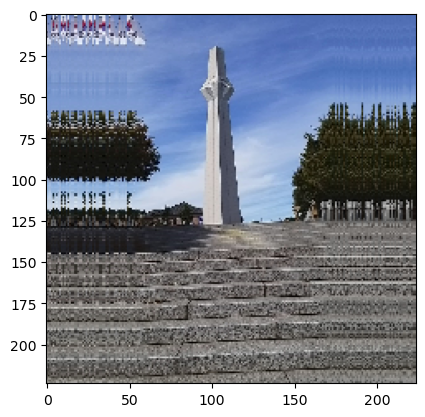

(224, 224, 3)

In [33]:
#대충 테스트 해보기
test_img=cv2.imread('train/9/20231022_1236270.jpg')

#Opencv는 BGR 순서이므로 RGB순서로 바꿔준다
temp=test_img[:,:,2].copy()
test_img[:,:,2]=test_img[:,:,0]
test_img[:,:,0]=temp
plt.imshow(img_resize(test_img))
plt.show()


In [13]:
# 이제 바꿔야하는데 데이터가 집컴퓨터에 있음
# 오늘 저녁에 할듯

def img_resize_small(img):
    
    height =img.shape[0]
    width = img.shape[1]
    
    height=int(height*224/width)
    width=224
    
    diff=int(height-width)
    half=int(diff/2)
    half2=224-diff-half
    random_size=10
    img=cv2.resize(img,dsize=(width,height),interpolation=cv2.INTER_NEAREST)
    
        
    return img[half:-half2]

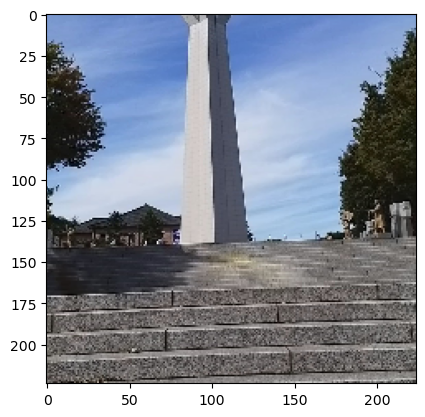

In [14]:
test_img=cv2.imread('train/9/20231022_1236270.jpg')
temp=test_img[:,:,2].copy()
test_img[:,:,2]=test_img[:,:,0]
test_img[:,:,0]=temp
plt.imshow(img_resize_small(test_img))
plt.show()

In [34]:
#train 데이터 좌우로 넓힌사진과 ->resize_big
# 상하로 자른 사진 ->resize_small
# 변환한뒤 train_resize 폴더에 저장

parent_directory = "train"
move_directory='train_resize'

for folder in os.listdir(parent_directory):
    directory=os.path.join(parent_directory,folder)
    for filename in os.listdir(directory):
        if filename.lower().endswith(".jpg"):
            filepath=os.path.join(directory,filename)
            movepath_big=os.path.join(os.path.join(move_directory,folder),'resize_big'+filename)
            movepath_small=os.path.join(os.path.join(move_directory,folder),'resize_small'+filename)
            
            img=cv2.imread(filepath)
            resize_big_img=img_resize(img)
            resize_small_img=img_resize_small(img)
            
            cv2.imwrite(movepath_big,resize_big_img)
            cv2.imwrite(movepath_small,resize_small_img)


In [42]:
#test할 때는 실제 앱상황과 맞게 하기 위해 
#resize_small 만 진행

parent_directory = "test"
move_directory='test_resize'

for folder in os.listdir(parent_directory):
    directory=os.path.join(parent_directory,folder)
    for filename in os.listdir(directory):
        if filename.lower().endswith(".jpg"):
            filepath=os.path.join(directory,filename)
            movepath_small=os.path.join(os.path.join(move_directory,folder),'resize_small'+filename)
            img=cv2.imread(filepath)
            resize_small_img=img_resize_small(img)
            cv2.imwrite(movepath_small,resize_small_img)


test\7\20231022_115139.jpg
test\7\20231022_115318.jpg
test\7\20231022_115322.jpg
test\7\20231022_115326.jpg
test\7\20231022_115331.jpg
test\7\20231022_115339 (2).jpg
test\7\20231022_115339.jpg
test\7\20231022_115341.jpg
test\7\20231022_115344.jpg
test\7\20231022_115358.jpg
test\7\20231022_115402.jpg
test\7\20231022_115407.jpg
test\7\20231022_115411.jpg
test\7\20231022_115414.jpg
test\7\20231022_115420.jpg
test\7\20231022_115431.jpg
test\7\20231022_115432.jpg
test\7\20231022_115436.jpg
test\7\20231022_115441.jpg
test\7\20231022_115444.jpg
test\7\20231022_115445.jpg
test\7\20231022_115450.jpg
test\7\20231022_115502.jpg
test\7\20231022_115507.jpg
test\7\20231022_115509.jpg
test\7\20231022_115511.jpg
test\7\20231022_115517.jpg
test\7\20231022_115519.jpg
test\7\20231022_115524.jpg
test\7\20231022_115526.jpg
test\7\20231022_115531 (2).jpg
test\7\20231022_115531.jpg
test\7\20231022_115534 (2).jpg
test\7\20231022_115534.jpg
test\7\20231022_115537.jpg
test\7\20231022_115540 (2).jpg
test\7\20231

test\9\20231022_123629.jpg
test\9\20231022_123630.jpg
test\9\20231022_123634.jpg
test\9\20231022_123636.jpg
test\9\20231022_123638.jpg
test\9\20231022_123639.jpg
test\9\20231022_123641.jpg
test\9\20231022_123642.jpg
test\9\20231022_123644(0).jpg
test\9\20231022_123644.jpg
test\9\20231022_123648.jpg
test\9\20231022_123649.jpg
test\9\20231022_123651.jpg
test\9\20231022_123653.jpg
test\9\20231022_123654.jpg
test\9\20231022_123658.jpg
test\9\20231022_123700.jpg
test\9\20231022_123701.jpg
test\9\20231022_123702.jpg
test\9\20231022_123709.jpg
test\9\20231022_123711.jpg
test\9\20231022_123713.jpg
test\9\20231022_123715.jpg
test\9\20231022_123716.jpg
test\9\20231022_123718.jpg
test\9\20231022_123719.jpg
test\9\20231022_123723(0).jpg
test\9\20231022_123723.jpg
test\9\20231022_123727(0).jpg
test\9\20231022_123727.jpg
test\9\20231022_123728.jpg
test\9\20231022_123729.jpg
test\9\20231022_123730.jpg
test\9\20231022_123732.jpg
test\9\20231022_123733.jpg
test\9\20231022_123734.jpg
test\9\20231022_123

## 근데 test이미지가 train 이미지보다 더 깔끔함